Журавлев К. В. ПИ20-1 Лабораторная работа 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mgnt = pd.read_csv('SBER_101001_171001.txt')
mvid = pd.read_csv('YNDX_101001_171001.txt')
mgnt.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [ ]:
res = pd.merge(mgnt, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20140604,0,87.81,118784670,YNDX,D,0,1170.0,35146
1,SBER,D,20140605,0,87.43,136633680,YNDX,D,0,1145.1,24973
2,SBER,D,20140606,0,89.00,127884670,YNDX,D,0,1163.0,7889
3,SBER,D,20140609,0,88.89,84744280,YNDX,D,0,1172.1,7304
4,SBER,D,20140610,0,88.99,85841300,YNDX,D,0,1170.0,3207


In [ ]:
x = np.array(res['<CLOSE>_x']).reshape(-1, 1)
y = np.array(res['<CLOSE>_y']).reshape(-1, 1)

In [ ]:
res.dropna(inplace = True)
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [ ]:
print(f'b1: {regr.coef_}')

b1: [[5.38121]]


In [ ]:
print(f'b0: {regr.intercept_}')

b0: [589.95599469]


In [ ]:
print(regr.score(x, y))

0.6574232077306452


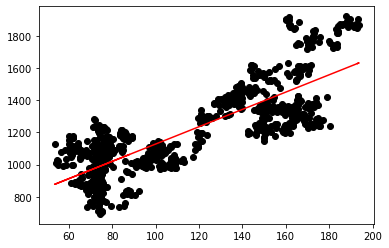

Среднеквадратичная ошибка: 24313.16
Коэффициент детерминации: 0.66


In [ ]:
y_pred = regr.predict(x)
plt.scatter(x, y, color ='black')
plt.plot(x, y_pred, color ='red')
plt.show()
print("Среднеквадратичная ошибка: %.2f" % mean_squared_error(y, y_pred))
print("Коэффициент детерминации: %.2f" % r2_score(y, y_pred))

In [ ]:
class hypothesis:
 
    def __init__(self): #конструктор класса
        self.b0 = 0    #атрибут  b0 - один параметр регрессии - инициализируем его нулём
        self.b1 = 0      #атрибут  b1 - второй параметр регрессии- инициализируем его тоже нулём
        
    def predict(self,x): # метод predict реализует саму регрессию
        return self.b0 + self.b1 * x  
    
    def error(self, X, Y):  # метод predict -error ошибки- среднеквадратическое отклонение (MSE) 
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
        
    def BGD(self, X, Y, alpha= 0, accuracy=0.01, max_steps=100):
        """реализует метод градиентного спуска, который запускается в цикле пока ошибка не перестанет меняться 
        существенно"""
        steps, errors = [], [] #заводим пустые массивы счётчиков и ошибок
        step = 0 #заводим счётчик итераций       
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            alpha += 0.0000005
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y) #вычисляем ошибку
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step) #добавляем номер счётчика в массив счётчиков
            errors.append(new_err) #добавляем значение ошибки в массив ошибок
        print(f'b0 и b1: {self.b0}, {self.b1}')
        return steps, errors #возвращает массив ошибок на каждой итерации спуска и номер итерации

In [ ]:
hyp = hypothesis()

In [ ]:
J = hyp.error(x, y)
print("initial error:", J)

initial error: [754518.59256563]


In [ ]:
X0 = np.linspace(x.min(), x.max(), len(x)) #генерируем последовательность чисел от 60 до 180 с одинаковым размером шага из 100 значений
Y0 = hyp.predict(X0) #находим соответствующие значениям X0 значения Y0 на прямой в соответствии с методом регрессии

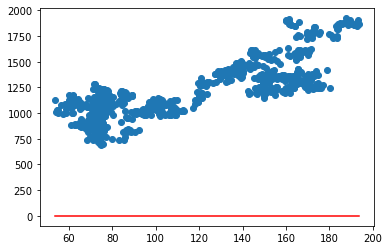

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r') # построение красной прямой
plt.show()

In [ ]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

b0 и b1: [0.2448298], [10.00833204]
error after gradient descent: [31573.43042909]


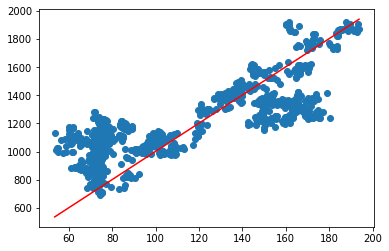

In [ ]:
X0 = np.linspace(x.min(), x.max(), len(x))
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

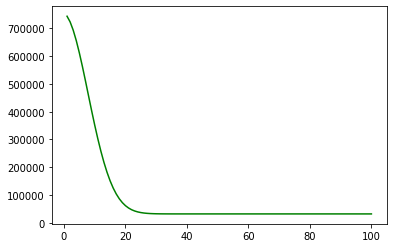

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()